In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('../data/diamonds_train.csv')

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [5]:
data.shape

(40455, 10)

* **Carat**:  diamond weigth

* **Cut**:  cut quality

* **Color**:  color

* **Clarity**:  diamond clarity and inclusions

* **Depth**:  realationship between z, x and y: z=mean(x+y). Depth refers to the distance between the culet and the table when the diamond is viewed from the side. The lower the depth %, the larger a diamond of a given carat weight will appear .

* **Table**:  top horizontal facet, expressed as the relationship with the average girdle diameter. Excellent quality -> 52-62% 

* **Price**:  

* **X**:  diamond length

* **Y**:  diamond width

* **Z**:  diamond height

In [6]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [16]:
# Checking for null values
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


Min value in x,y,z is 0...

In [17]:
# Dropping nosense rows:

x_filter = data['x']==0
y_filter = data['y']==0
z_filter = data['z']==0

data.drop(data[(x_filter | y_filter | z_filter)].index, inplace=True)

In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000
mean,0.797425,61.753013,57.445543,3926.535448,5.729616,5.732897,3.538553
std,0.475257,1.431306,2.233055,3990.024501,1.122384,1.145002,0.693639
min,0.200000,43.000000,43.000000,326.000000,3.770000,3.720000,1.070000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2396.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5329.500000,6.540000,6.540000,4.040000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


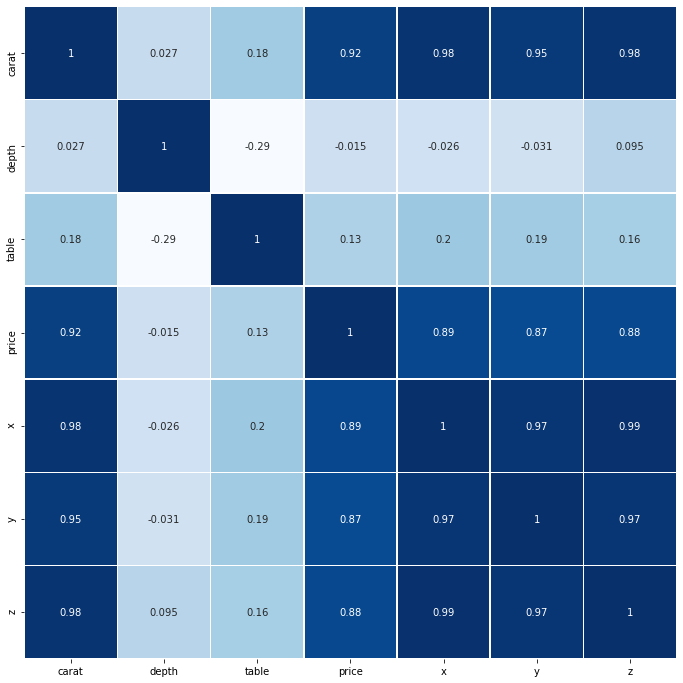

In [24]:
# Correlation matrix:

plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True,cmap='Blues',square=True,linewidths=.5, cbar=False);




# Depth is inversely related to Price.

        #This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.

# The Price of the Diamond is highly correlated to Carat, and its Dimensions.

# The Weight (Carat) of a diamond has the most significant impact on its Price.



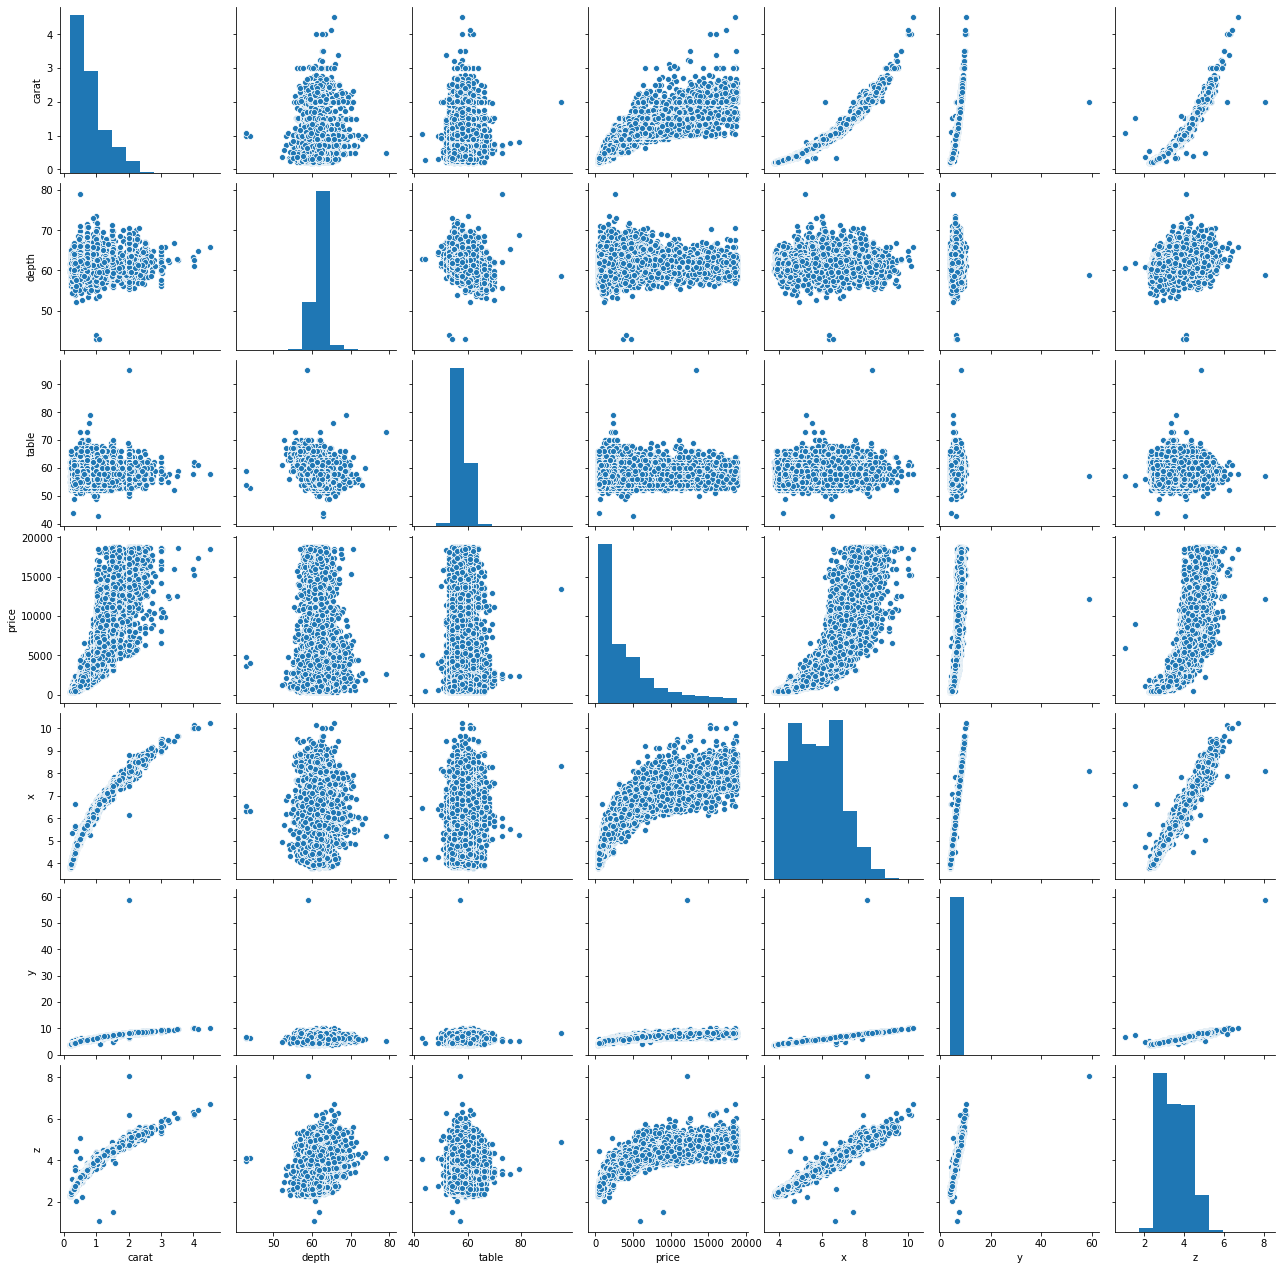

In [25]:
# Numerical cata
sns.pairplot(data)

## Price

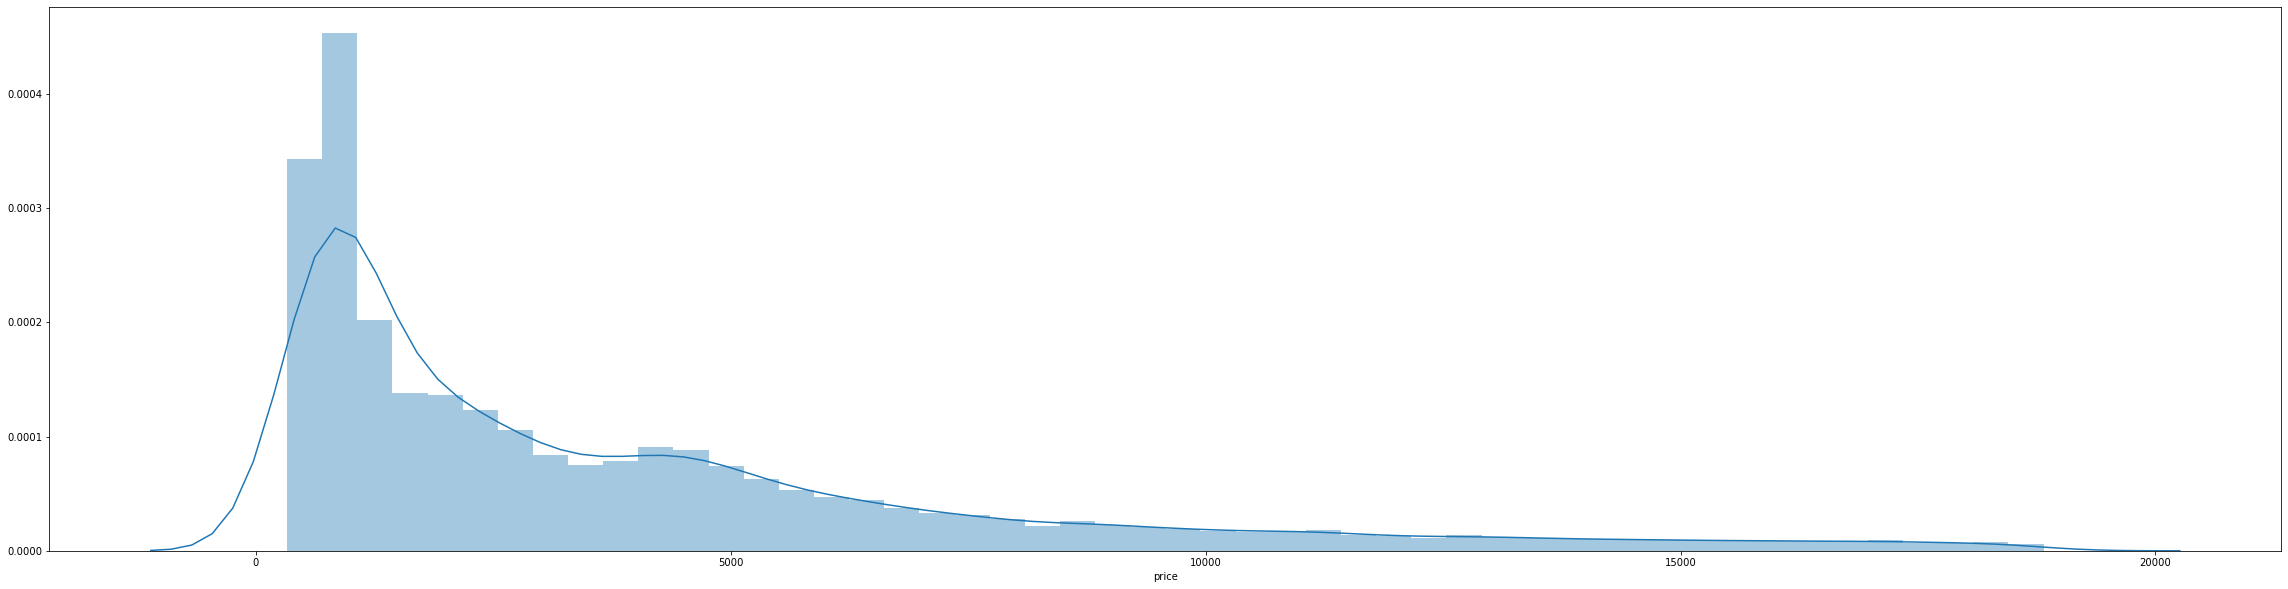

In [206]:
plt.figure(figsize=(40,10))
sns.distplot(data['price'])

## Cut

In [123]:
col_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

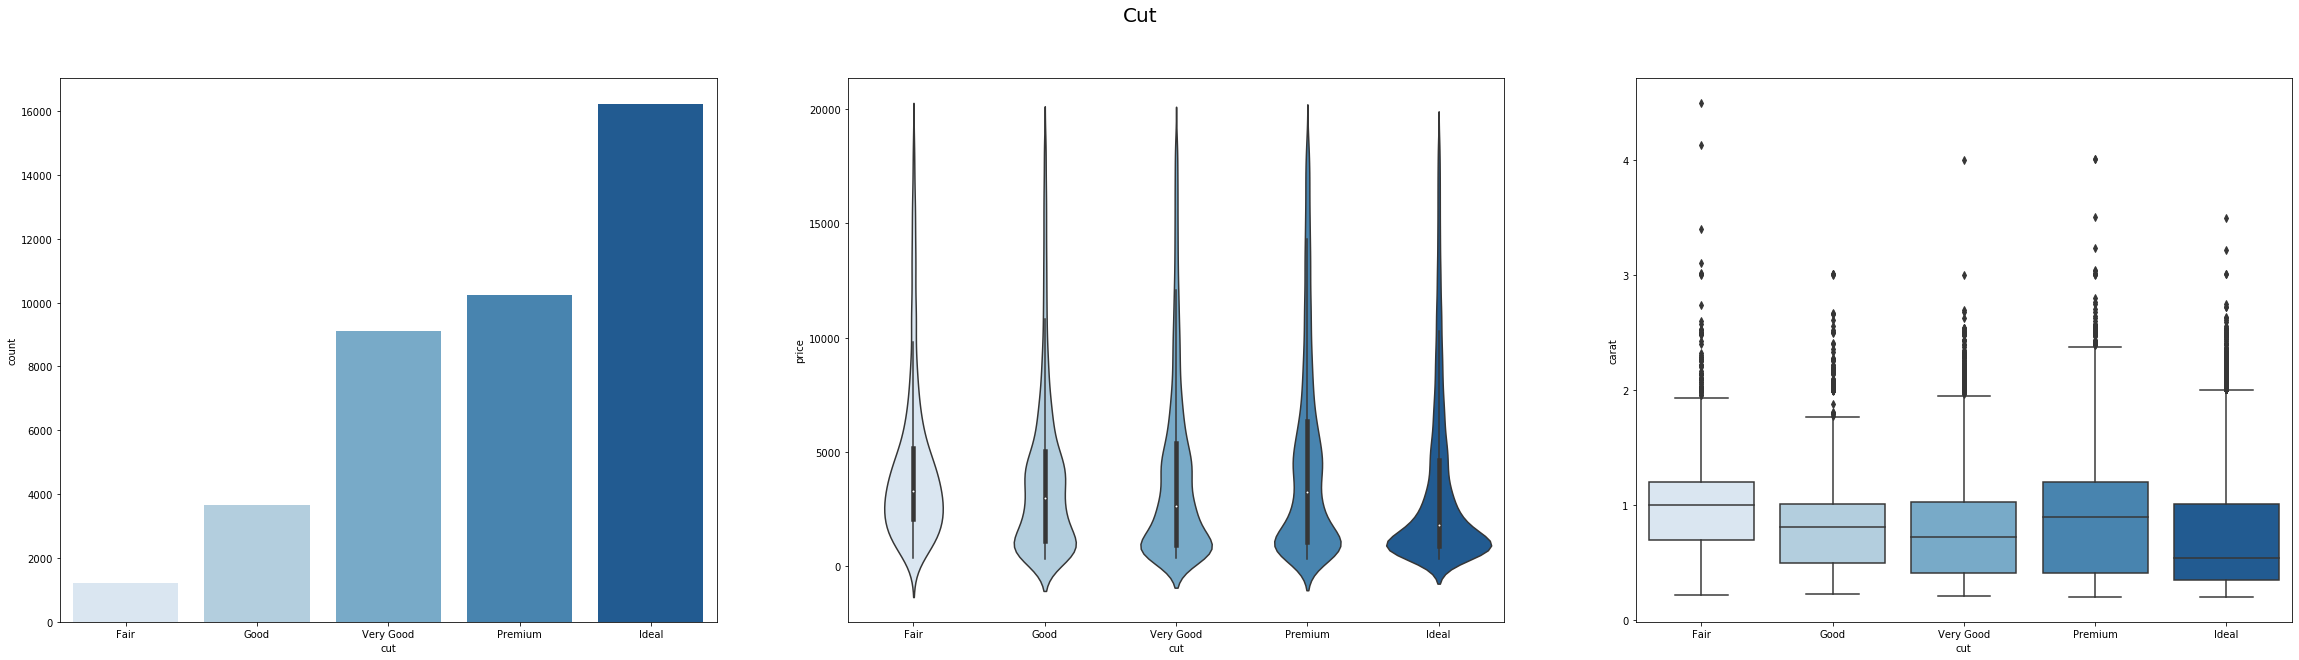

In [135]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Cut', fontsize= 20)

sns.countplot(data=data, ax=axes[0], x='cut', palette='Blues', order=col_order)
sns.violinplot(data=data, ax=axes[1],x='cut', y='price', palette='Blues', order=col_order)
sns.boxplot(data= data, ax=axes[2], x='cut', y='carat', palette='Blues', order=col_order);

## Color

In [101]:
col_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

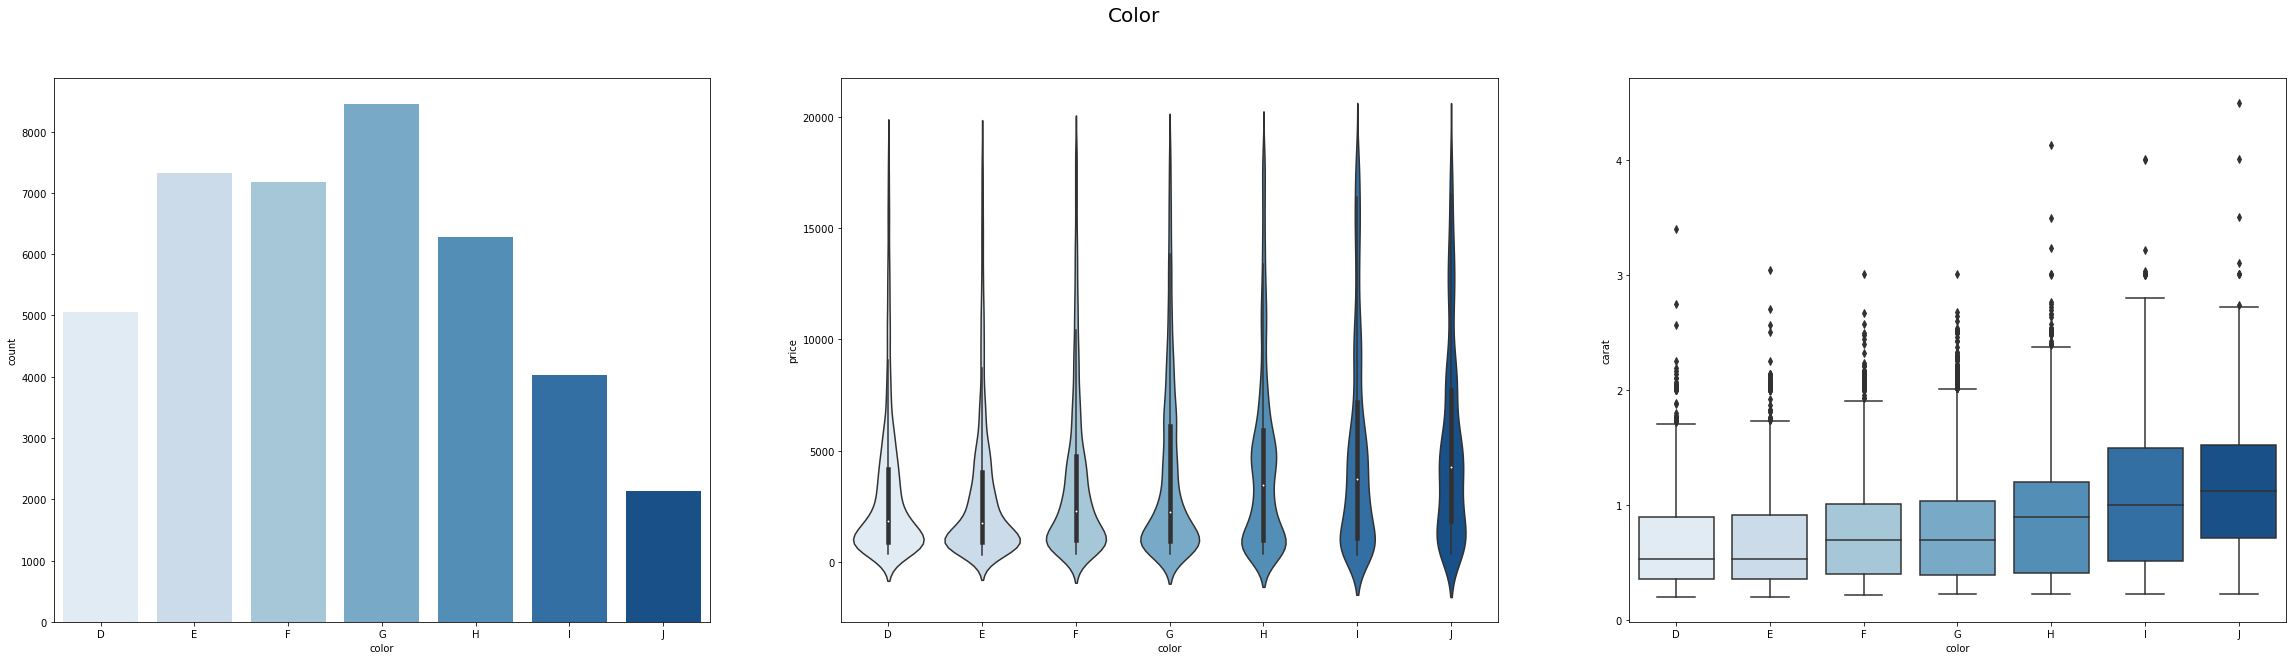

In [102]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Color', fontsize= 20)

sns.countplot(data=data, ax=axes[0], x='color', palette='Blues', order=col_order)
sns.violinplot(data=data, ax=axes[1],x='color', y='price', palette='Blues', order=col_order)
sns.boxplot(data= data, ax=axes[2], x='color', y='carat', palette='Blues', order=col_order);

## Clarity

In [219]:
col_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

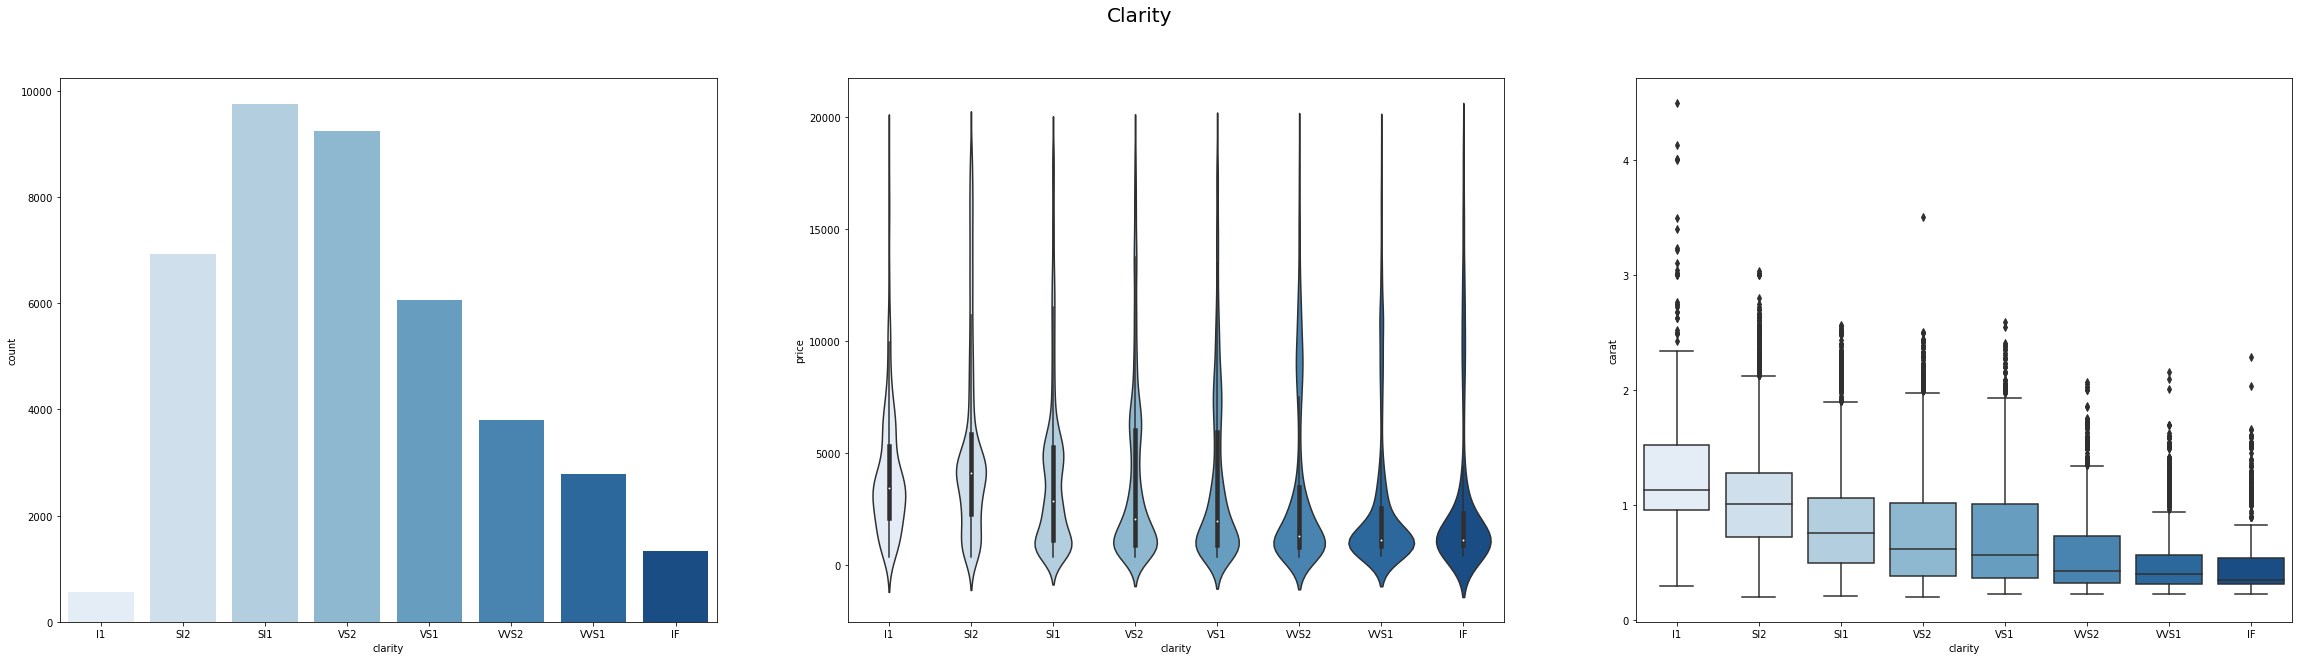

In [220]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Clarity', fontsize= 20)

sns.countplot(data=data, ax=axes[0], x='clarity', palette='Blues', order=col_order)
sns.violinplot(data=data, ax=axes[1],x='clarity', y='price', palette='Blues', order=col_order)
sns.boxplot(data= data, ax=axes[2], x='clarity', y='carat', palette='Blues', order=col_order);

## Carat

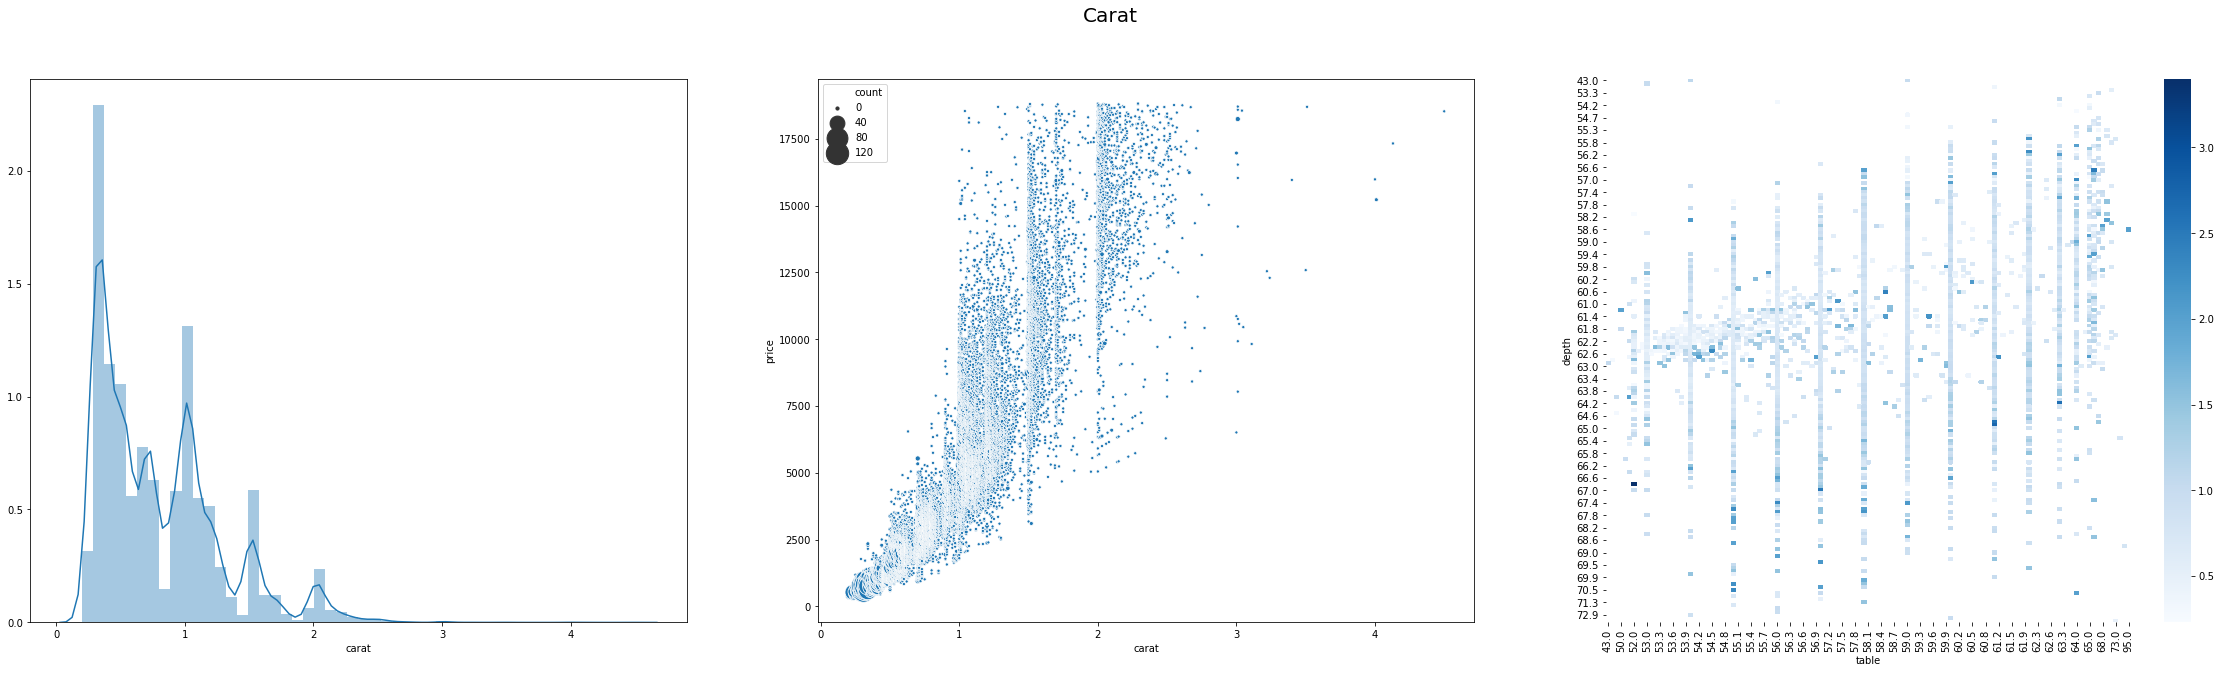

In [201]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Carat', fontsize= 20)

sns.distplot(data['carat'], ax=axes[0])


carat_price=data[['carat', 'price', 'cut']].groupby(['carat', 'price']).agg(count=('cut','count')).reset_index()
sns.scatterplot(data=carat_price, ax=axes[1], x='carat', y='price', size='count', palette='Blues',sizes=(10, 500))

carat_depth_table= data[['carat', 'depth', 'table']].pivot_table(index='depth', columns='table', aggfunc='mean')
carat_depth_table.columns = carat_depth_table.columns.droplevel(0)
sns.heatmap(carat_depth_table, ax=axes[2], cmap='Blues');

## Color/Cut/Clarity vs Avg. Price

In [212]:
cut_color = data[['color', 'cut', 'price']].pivot_table(index='color', columns='cut', aggfunc='mean')
cut_color.columns = cut_color.columns.droplevel(0)
cut_color = cut_color[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]

In [218]:
cut_clarity = data[['clarity', 'cut', 'price']].pivot_table(index='clarity', columns='cut', aggfunc='mean')
cut_clarity.columns = cut_clarity.columns.droplevel(0)
cut_clarity.reindex(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
cut_clarity = cut_clarity[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]

In [223]:
color_clarity = data[['clarity', 'color', 'price']].pivot_table(index='color', columns='clarity', aggfunc='mean')
color_clarity.columns = color_clarity.columns.droplevel(0)
color_clarity = color_clarity[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]

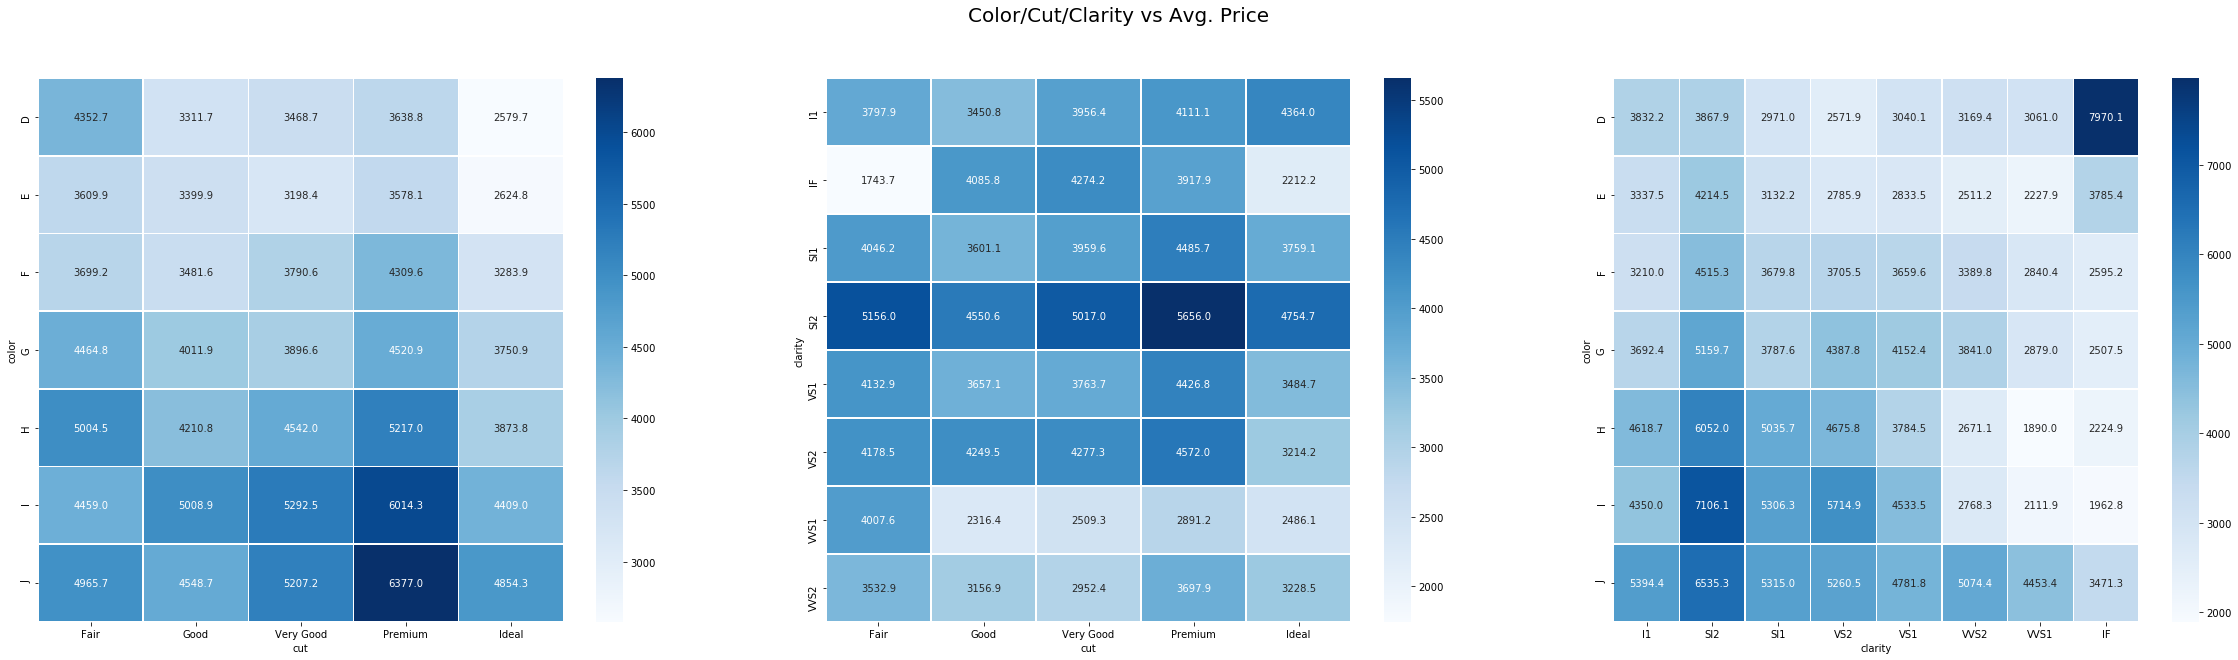

In [222]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Color/Cut/Clarity vs Avg. Price', fontsize= 20)

sns.heatmap(cut_color, annot=True, fmt='.1f', ax=axes[0], cmap='Blues',linewidths=.5)
sns.heatmap(cut_clarity, annot=True, fmt='.1f', ax=axes[1], cmap='Blues',linewidths=.5)
sns.heatmap(color_clarity, annot=True, fmt='.1f', ax=axes[2], cmap='Blues',linewidths=.5);

# Relacionar volumen (x,y,x) con precio